Input image file: C:/Users/shree ganesh/Desktop/Hough_project_sip/road_img.png
True
*************************


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\shree ganesh\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\shree ganesh\AppData\Local\Temp\ipykernel_133944\3673129893.py", line 217, in callback
    if filename!='n' and len(acc)!=0 and len(selection)!=0:
NameError: name 'selection' is not defined


False
*************************


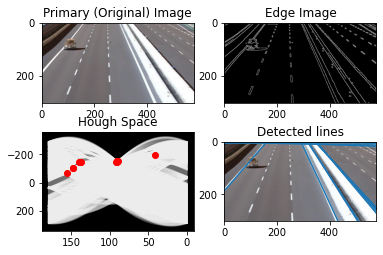

In [1]:
#GNR 607 Programming Assignment: Detecting lines using Hough Transform
#Course instructor: Prof. B. K. Mohan
#CSRE, IIT Bombay
#Group Members: Amit, Arunim, Ganesh, Jaishree

#Start

#importing essential libraries

import tkinter as tk
from tkinter import filedialog
import cv2
from tkinter import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import os

#defining hough transform function
#apprach 1 = slope-intercept form , approach 2 = polar form

def hough_transform(input_img, approach, threshold):

    approach=int(approach)
    threshold=int(threshold)
    
    if approach == 1:

        #reading the input image and getting the canny edge detection output
        input_img = cv2.imread(input_img)   
        edge_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY) #for opencv bgr
        edge_img = cv2.GaussianBlur(edge_img, (3, 3), 1)   #gaussian blur 0 smoothing
        edge_img = cv2.Canny(edge_img, 100, 200)  #Canny edge detection

        #getting image size, threshold
        height, width = edge_img.shape[:2]   
        half_height, half_width = height / 2, width / 2
        
        #creating accumulator
        m_list=np.arange(-200,200,step=1)
        c_list=np.arange(-200,200,step=1)
        accumulator = np.zeros((len(m_list), len(c_list)))   #accumulator array of m & c with zero values
        
        #plotting figures
        
        figure=plt.figure(num='Hough Transform')
        subplot1 = figure.add_subplot(2, 2, 1)
        subplot1.imshow(input_img)
        subplot2 = figure.add_subplot(2, 2, 2)
        subplot2.imshow(edge_img, cmap="gray")
        subplot3 = figure.add_subplot(2, 2, 3)
        subplot3.set_facecolor((0, 0, 0))
        subplot4 = figure.add_subplot(2, 2, 4)
        subplot4.imshow(input_img)

        #For all the pixels
        for y in range(height):
            for x in range(width):
                if edge_img[y][x] != 0:#white pixel check, edge point = [y, x]
            
                    ys, xs = [], []
                    for m_indx in range(len(m_list)):
                      c=-m_list[m_indx]*x+y
                      m=m_list[m_indx]

                      c_indx=np.argmin(np.abs(c_list-c))
                      
                      accumulator[c_indx][m_indx] += 1
                      ys.append(c)
                      xs.append(m)
                      
                    subplot3.plot(xs, ys, color="white", alpha=0.05)

      ##

    #looping through accumulator
        for y in range(2,accumulator.shape[0]-2):
            for x in range(2,accumulator.shape[1]-2):
                if accumulator[y][x] > threshold:  #checking for threshold count

                    c = c_list[y]  
                    m = m_list[x]

                    x1 = 1000+half_width
                    y1 = m*x1+c  
                    x2= -1000+half_width
                    y2= m*x2+c
                    subplot3.plot([m], [c], marker='H', color="red")
                    subplot4.add_line(mlines.Line2D([x1, x2], [y1, y2]))



        subplot3.invert_yaxis()
        subplot3.invert_xaxis()

        subplot1.title.set_text("Primary (Original) Image")
        subplot2.title.set_text("Edge Image")
        subplot3.title.set_text("Hough Space")
        subplot4.title.set_text("Detected lines")
        plt.show()    

    else:
        total_rs=200
        total_qs=180
        threshold=int(threshold)

        #reading the input image and generating Canny edge detection output
        input_img = cv2.imread(input_img)   
        edge_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY) #image for opencv bgr
        edge_img = cv2.GaussianBlur(edge_img, (3, 3), 1)   #gaussian blur 0 smoothing
        edge_img = cv2.Canny(edge_img, 100, 200)  #binary output

        # finding image height & width
        height, width = edge_img.shape[:2]   
        half_height, half_width = height / 2, width / 2

        #defining increment steps for rho(r) & theta(q)
        diagonal = np.sqrt(np.square(height) + np.square(width)) #finding max d(diagonal) value 
        dq = 180 / total_qs  #incrementing steps of theta
        dr = (2 * diagonal) / total_rs  # steps for roh (-diagonal to +diagonal) steps
        
        qs = np.arange(0, 180, step=dq)   #list of theta values
        rs = np.arange(-diagonal, diagonal, step=dr)   #list of rho values
        
        # list of sines and cosines
        
        cos_qs = np.cos(np.deg2rad(qs))  
        sin_qs = np.sin(np.deg2rad(qs))  
        
        #creating accumulator array of r-q with zero values
        accumulator = np.zeros((len(rs), len(qs)))   
        
        #plotting figures
        figure=plt.figure(num='Hough Transform')
        subplot1 = figure.add_subplot(2, 2, 1)
        subplot1.imshow(input_img)
        subplot2 = figure.add_subplot(2, 2, 2)
        subplot2.imshow(edge_img, cmap="gray")
        subplot3 = figure.add_subplot(2, 2, 3)
        subplot3.set_facecolor((0, 0, 0))
        subplot4 = figure.add_subplot(2, 2, 4)
        subplot4.imshow(input_img)

  #For all the pixels in image
        for y in range(height):
            for x in range(width):
                if edge_img[y][x] != 0:  #checking for white pixels
                    edge_point = [y - half_height, x - half_width] #shifting origin
                    ys, xs = [], [] 
                    for q_idx in range(len(qs)): 
                      r = (edge_point[1] * cos_qs[q_idx]) + (edge_point[0] * sin_qs[q_idx]) #finding r value
                      q = qs[q_idx]  #saving q values to variable
                      r_idx = np.argmin(np.abs(rs - r)) #subtracting r from list of rs and finding index of minimum 

                      accumulator[r_idx][q_idx] += 1 #incrementing accumulator  with index of r and q
                      ys.append(r) #saving r value in list
                      xs.append(q) #saving q value in list
                    subplot3.plot(xs, ys, color="white", alpha=0.05)

#looping through accumulator
        for y in range(accumulator.shape[0]):
            for x in range(accumulator.shape[1]):
              if accumulator[y][x] > threshold:  #checking for threshold count
                r = rs[y]  
                q = qs[x]
                a = np.cos(np.deg2rad(q))
                b = np.sin(np.deg2rad(q))
                x0 = (a * r) + half_width
                y0 = (b * r) + half_height
                x1 = int(x0 + 1000 * (-b))   
                y1 = int(y0 + 1000 * (a))
                x2 = int(x0 - 1000 * (-b))
                y2 = int(y0 - 1000 * (a))
                subplot3.plot([q], [r], marker='o', color="red", linewidth = 2) #plotting r-q space
                subplot4.add_line(mlines.Line2D([x1, x2], [y1, y2])) #plotting lines

        subplot3.invert_yaxis()
        subplot3.invert_xaxis()

        subplot1.title.set_text("Primary (Original) Image")
        subplot2.title.set_text("Edge Image")
        subplot3.title.set_text("Hough Space")
        subplot4.title.set_text("Detected lines")
        plt.show()





#file upload
def UploadAction(event=None):
    global filename
    filename = filedialog.askopenfilename()

    print('Input image file:', filename)
    f="Image uploaded, please click on RUN button and wait..."
    label.config(text = f, font = ('Helvetica20 10'))

#radio button selection - 1 or 2
def sel():
    global selection
    selection = str(var.get())
    label.config(text = selection, fg ="blue", font = ('Helvetica20 14'))


#button clicked
def callback():
    global buttonClicked
    buttonClicked = not buttonClicked 
    print(buttonClicked)
    print("*************************")

    acc=entry.get()
    # print(acc)
    # print(filename)
    # print(selection)
    if filename!='n' and len(acc)!=0 and len(selection)!=0:
        label.config(text = "Hough transform running..." , fg = "blue")
        hough_transform(filename,selection,acc)
        label.config(text = "Hough transform computed", fg = "green")
    else:
        label.config(text = "Please fill all the required fields", fg ="red")



if __name__ == "__main__":
# def gui():

    root = tk.Tk()
    root.title('Hough Transform')
    root.geometry('700x550')


    p = tk.Label(root, text="GNR607 COURSE PROJECT \n Detecting straight lines using Hough transform  " , font = ('Helvetica20 18'), bg = "gray")
    p.pack(side= TOP,anchor=N,padx=10, pady=10)

    w = tk.Label(root, text="Select approach for Hough Transform:", font =('Helvetica20 14'))
    w.pack(side= TOP,anchor=N,padx=10, pady=10)

    var = IntVar()
    R1 = Radiobutton(root, text="Slope Intercept form", font =('Helvetica20 11'), fg = "blue", variable=var, value=1,
                      command=sel)
    R1.pack( anchor = W )
    R1.pack(padx=20)
    R2 = Radiobutton(root, text="Polar form", font =('Helvetica20 11'), fg = "blue", variable=var, value=2,
                      command=sel)
    R2.pack( anchor = W )
    R2.pack(padx=20, pady = 14)

    label = Label(root)
    label.pack( side= BOTTOM, anchor = W, padx=20,  pady=20)

    w = tk.Label(root, text=" Enter threshold value for accumulator:", font = 'Helvetica20 12')
    w.pack(side= TOP,anchor=W, padx=10)

    #Create an Entry widget to accept User Input
    entry= Entry(root, width= 10)
    entry.focus_set()
    entry.pack(side= TOP,anchor=W,padx=20, pady=10)

    w = tk.Label(root, text="Upload input image:", font = ('Helvetica20 12'))
    w.pack(side= TOP,anchor=W, padx=10, pady=15)

    filename="n"
    button = tk.Button(root, text='Upload', font =('Helvetica20 12'), command=UploadAction)
    button.pack(side = TOP,anchor=W, padx=20)  


    buttonClicked  = False # Bfore first click

    b = Button(root, text="RUN", command=callback, font =('Helvetica20 12'))
    b.pack(side = BOTTOM, anchor =S)


    d = tk.Label(root, text="Presented by: \n Amit, Arunim, Ganesh, Jaishree \n IIT Bombay", font = 'Helvetica20 11')
    d.pack(side= BOTTOM,anchor=E,padx=15, pady=15)




    root.mainloop()




    


